# Project: Decision-making in the business "Internet shop"

 **Project Objective**

- **Part 1:** Prioritise the hypotheses from the prepared list;

- **Part 2:** Analysing the A/B test and according to item #14 you need to make a decision on the results of the test and explain it:

1. Stop the test, record the victory of one of the groups.
2. Stop the test, record no difference between the groups.
3. Continue the test.

### 1. Loading data and preparing it for analysis.

In [1]:
# Connect basic libraries and read external data

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Reading data

try:
    hypothesis, orders, visitors = (
        pd.read_csv('/Users/elenpogosan/python_data/Projects_modul_2/Принятие решений в Бизнесе/hypothesis.csv'),
        pd.read_csv('/Users/elenpogosan/python_data/Projects_modul_2/Принятие решений в Бизнесе/orders.csv'),
        pd.read_csv('/Users/elenpogosan/python_data/Projects_modul_2/Принятие решений в Бизнесе/visitors.csv')
    )


except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )

In [3]:
# remove the restriction on the number of columns and column width:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Dataframe output hypothesis: 9 entries × 5 columns.
hypothesis.info()
display(hypothesis)
print('-----------------------------------------------------------------------------')
# Dataframe output: 1197 entries × 5 columns.
orders.info()
display(orders)
print('-----------------------------------------------------------------------------')
# Dataframe output: 62 entries × 3 columns.
visitors.info()
display(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


-----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


-----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [5]:
# Number of skips by column hypothesis
display(hypothesis.isna().sum())
print('-----------------------------------------------------------------------------')
# Number of skips by column orders
display(orders.isna().sum())
print('-----------------------------------------------------------------------------')
# Number of skips by column visitors
display(visitors.isna().sum())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

-----------------------------------------------------------------------------


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

-----------------------------------------------------------------------------


date        0
group       0
visitors    0
dtype: int64

**Findings from step 1:**

There are no skips in dataframes, but the data type for columns with date requires correction from text object to datetime

In [6]:
# Lowercase and correction in column names

hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

display(hypothesis.columns)
display(orders.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [7]:
# Checking for duplicates

display(hypothesis.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

In [8]:
# translate date from object to datetime

orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### 2. Part 1: Prioritisation of hypotheses from the prepared list.

Apply the ICE framework to prioritise the hypotheses. Sort them in descending order of priority.
Apply the RICE framework to prioritise the hypotheses. Sort them in descending order of priority.
State how the prioritisation of hypotheses changed when applying RICE instead of ICE. Explain why this was the case.

Hypothesis - a brief description of the hypothesis;
Reach - reach of users on a 10-point scale;
Impact - impact on users on a 10-point scale;
Confidence - confidence in the hypothesis on a 10-point scale;
Efforts - expenditure of resources to test the hypothesis on a 10-point scale. The greater the Efforts value, the more expensive the hypothesis testing.

In [9]:
# Apply the ICE framework to prioritise hypotheses

hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(5)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000


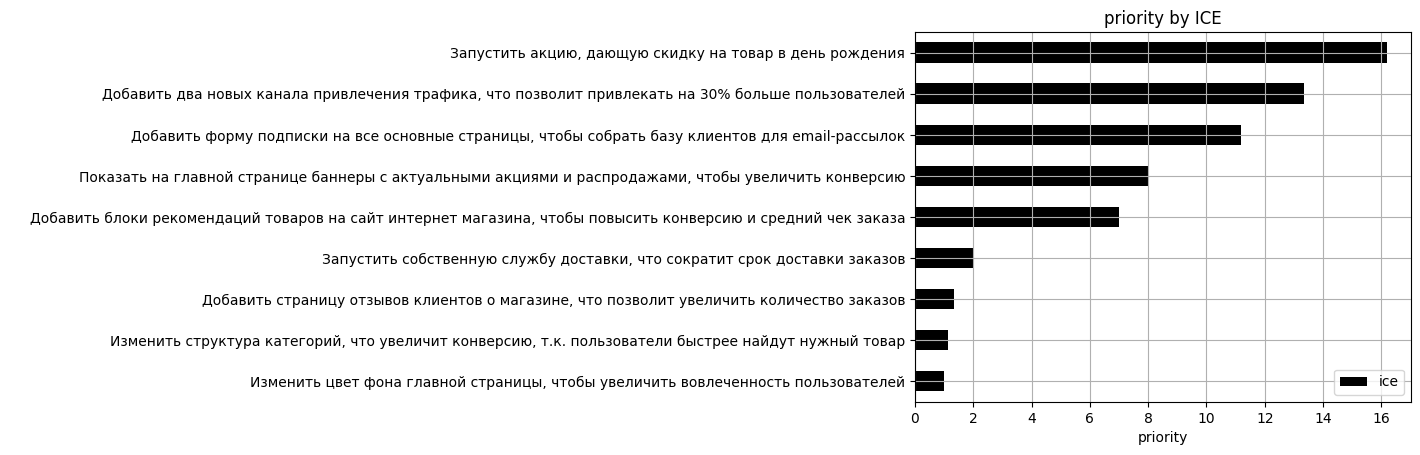

In [10]:
# ICE histogram

fig_1 = (hypothesis[['hypothesis', 'ice']].set_index('hypothesis').sort_values('ice')
         .plot(kind='barh', color='black', grid=True))
fig_1.set_title('priority by ICE')
fig_1.set_xlabel('priority')
fig_1.set_ylabel(' ')
plt.show()

In [11]:
# Apply the RICE framework to prioritise hypotheses, add Reach

hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).head(5)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2


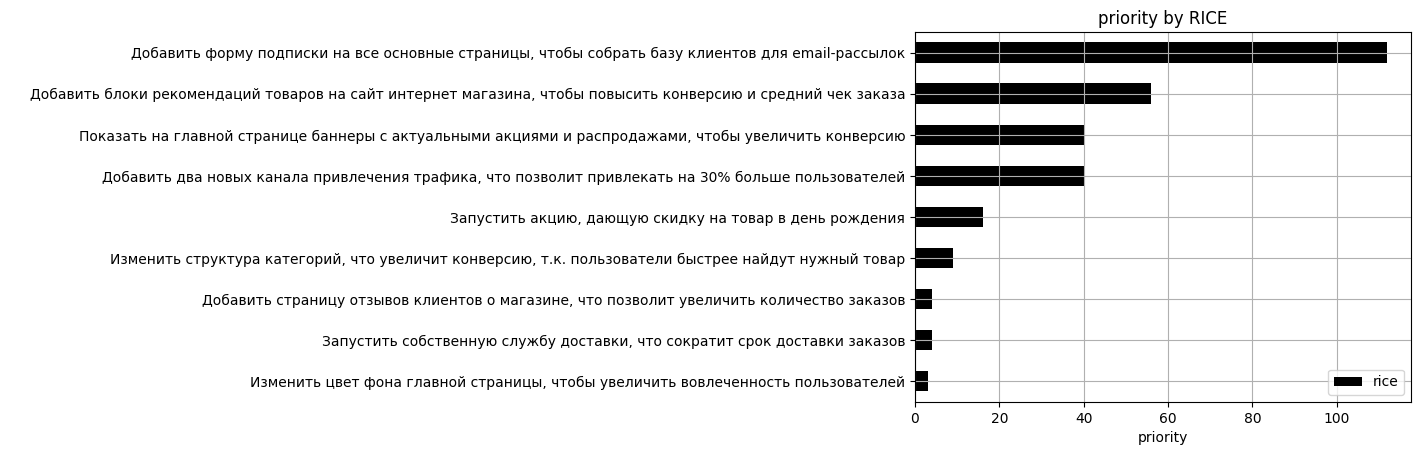

In [12]:
# RICE histogram

fig_2 = (hypothesis[['hypothesis', 'rice']].set_index('hypothesis').sort_values('rice')
         .plot(kind='barh', color='black', grid=True))
fig_2.set_title('priority by RICE')
fig_2.set_xlabel('priority')
fig_2.set_ylabel(' ')
plt.show()

In [13]:
hypothesis[['hypothesis', 'ice', 'rice']].sort_values(by='rice', ascending=False).head(7)

,hypothesis,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0


**Conclusions:**

In prioritisation with 'RICE' as opposed to 'ICE' we add coverage (the number of users affected by the changes) as a result the sequence of hypotheses changes after the calculations, as the tables above show.

### 3. Part 2: Analysing the A/B test.

In [14]:
# Array of unique pairs of date and group values using the drop_duplicates() method:
datesGroups = orders[['date', 'group']].drop_duplicates()

# Collect aggregated cumulative daily order data:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }), axis=1).sort_values(by=['date', 'group'])

display(ordersAggregated.head(5))

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [15]:
# Get day-by-day aggregated cumulative data about online shop visitors:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {
            'date' : 'max',
            'group' : 'max',
            'visitors' : 'sum'
        }), axis=1).sort_values(by=['date','group'])

display(visitorsAggregated.head(5))

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [16]:
# Combine the cumulative data in one table and give its columns clear names:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Add cumulative conversion and limit to 3 decimal places:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

pd.options.display.float_format = '{:,.3f}'.format

# Cumulative table output:
display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033
1,2019-08-01,B,21,20,101217,713,0.029
2,2019-08-02,A,44,38,242401,1338,0.033
3,2019-08-02,B,45,43,266748,1294,0.035
4,2019-08-03,A,68,62,354874,1845,0.037


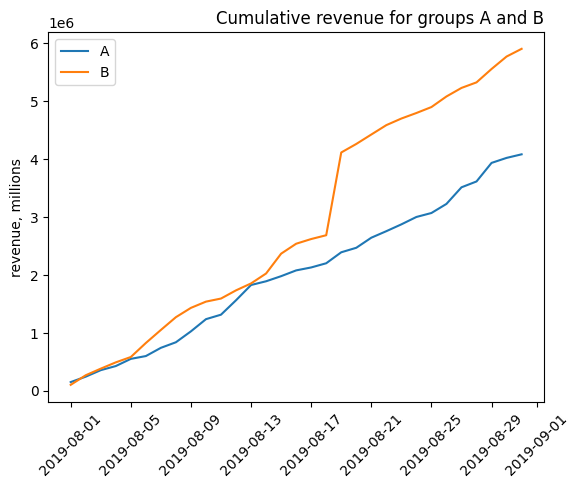

In [17]:
# Separate group A data
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Separate group B data
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Cumulative graph of revenue by group:
plt.plot(cumulativeDataA['date'].values, cumulativeDataA['revenue'].values, label='A')
plt.plot(cumulativeDataB['date'].values, cumulativeDataB['revenue'].values, label='B')
plt.title('Cumulative revenue for groups A and B', loc='right')
plt.ylabel("revenue, millions")
plt.xticks(rotation=45)
plt.legend()
plt.show();

- Group 'B' has higher revenue compared to Group 'A'.
- It can be seen that between 17 and 21 August 2019, Group 'B' had a sharp jump of c ≈3 million to ≈4 million.

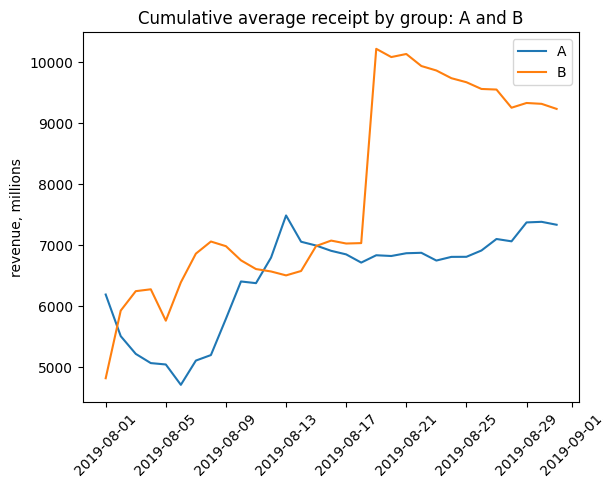

In [18]:
# Graph of cumulative average cheque by group:
plt.plot(cumulativeDataA['date'].values, cumulativeDataA['revenue'].values / cumulativeDataA['orders'].values, label='A')
plt.plot(cumulativeDataB['date'].values, cumulativeDataB['revenue'].values / cumulativeDataB['orders'].values, label='B')
plt.title('Cumulative average receipt by group: A and B', loc='center')
plt.ylabel("revenue, millions")
plt.xticks(rotation=45)
plt.legend()
plt.show();

- Group 'A' revenue plateaued after 13 August,
- Group 'B' revenue had a sharp jump, more likely due to a single data error or one or more large purchases during this time period.

In [19]:
# Cumulative average cheque table:

mergedCumulativeRevenue = cumulativeDataA.merge(cumulativeDataB,
    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

display(mergedCumulativeRevenue.head(5))

,date,groupA,ordersA,buyersA,revenueA,visitorsA,conversionA,groupB,ordersB,buyersB,revenueB,visitorsB,conversionB
0,2019-08-01,A,24,20,148579,719,0.033,B,21,20,101217,713,0.029
1,2019-08-02,A,44,38,242401,1338,0.033,B,45,43,266748,1294,0.035
2,2019-08-03,A,68,62,354874,1845,0.037,B,61,59,380996,1803,0.034
3,2019-08-04,A,84,77,425699,2562,0.033,B,78,75,489567,2573,0.030
4,2019-08-05,A,109,100,549917,3318,0.033,B,101,98,581995,3280,0.031


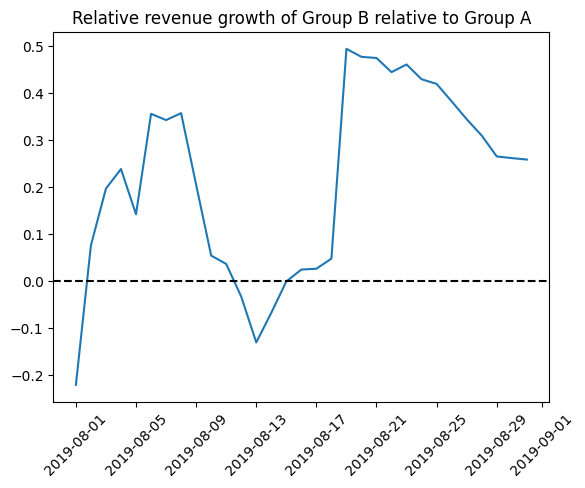

In [20]:
# Graph of relative change in cumulative average cheque of group 'B' to group 'A':

plt.plot(mergedCumulativeRevenue['date'].values,
        ((mergedCumulativeRevenue['revenueB'].values / mergedCumulativeRevenue['ordersB'].values) /
         (mergedCumulativeRevenue['revenueA'].values / mergedCumulativeRevenue['ordersA'].values)-1))

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative revenue growth of Group B relative to Group A')
plt.xticks(rotation=45)
plt.show();

- There are two peaks on 9 August and 17 August,
- The peaks could be the result of a data error or one or more large purchases during this time period.

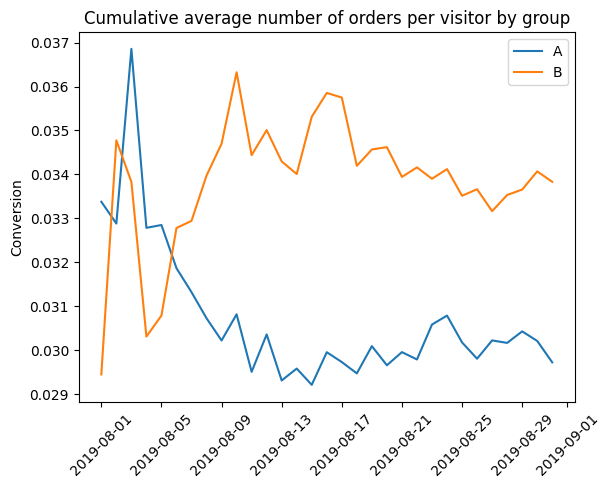

In [21]:
# Graph of cumulative average number of orders per visitor by group:

# cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
plt.plot(cumulativeDataA['date'].values, cumulativeDataA['conversion'].values, label='A')
plt.plot(cumulativeDataB['date'].values, cumulativeDataB['conversion'].values, label='B')
plt.legend()

plt.title('Cumulative average number of orders per visitor by group')
plt.ylabel('Conversion')
plt.xticks(rotation=45)
plt.show();

- After 9 August, the values enter a narrow range of values (plateau),
- The average number of orders per visitor of group B is higher than group A.

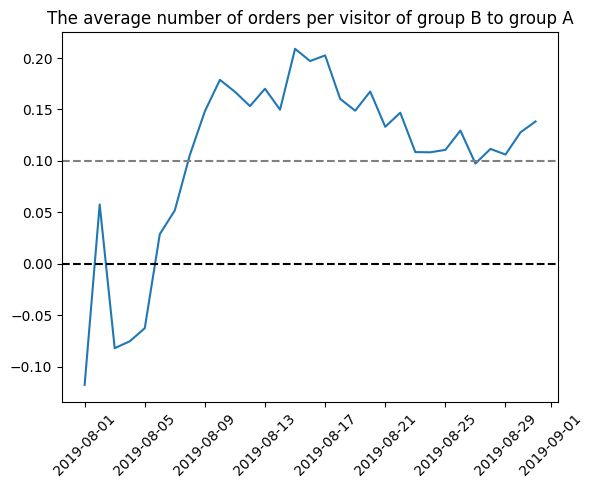

In [22]:
# Graph of the relative change in the cumulative average number of orders per visitor from group B to group A:

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']],
    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'].values,
         mergedCumulativeConversions['conversionB'].values/mergedCumulativeConversions['conversionA'].values-1,)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='gray', linestyle='--')
plt.title('The average number of orders per visitor of group B to group A')
plt.xticks(rotation=45)
plt.show();

- Group A was higher until ≈5 August, but after that date group B pulled ahead and has been gently correcting since ≈17 August, now group B is rising again,
- We need to see a 'cleaned' graph without spikes in the data,
- Group B orders were over 10% higher for most of the test.

In [23]:
# Number of orders by user:

ordersByUsers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})

ordersByUsers.columns = ['visitor_id', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head())
display(ordersByUsers['orders'].describe())

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


count   1,031.000
mean        1.161
std         0.725
min         1.000
25%         1.000
50%         1.000
75%         1.000
max        11.000
Name: orders, dtype: float64

- I see there's a customer who made 11 orders in a month.

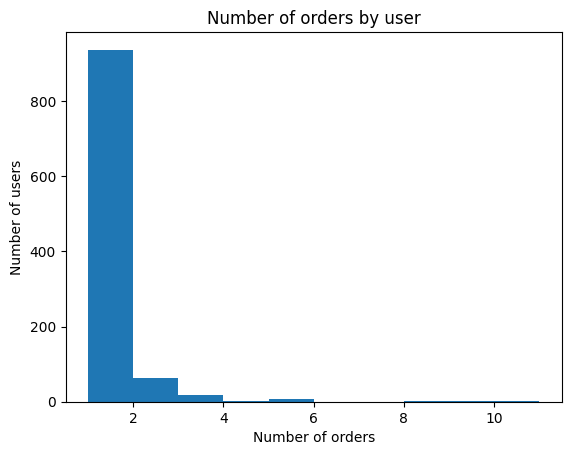

In [24]:
# Distribution histogram:
plt.hist(ordersByUsers['orders'])
plt.title('Number of orders by user')
plt.xlabel('Number of orders')
plt.ylabel('Number of users')
plt.show();

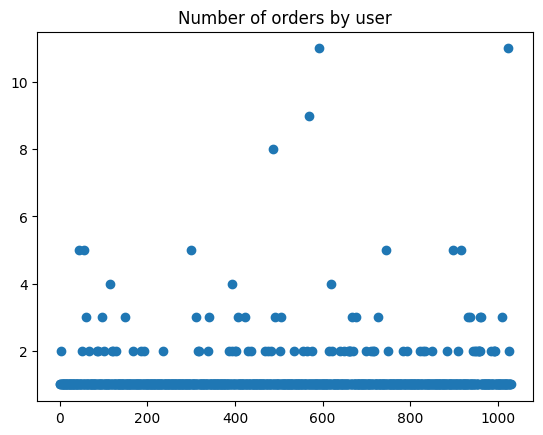

In [25]:
# A dot plot of the number of orders by user:

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Number of orders by user')
plt.show();

- Lots of orders from 1 to 3 per month,
- There are spot orders above 6.

In [26]:
# Count the 95th and 99th percentiles of orders per user:

np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

- No more than 5% of users made more than 2 purchases during the test,
- No more than 1% of users made more than 4 purchases.

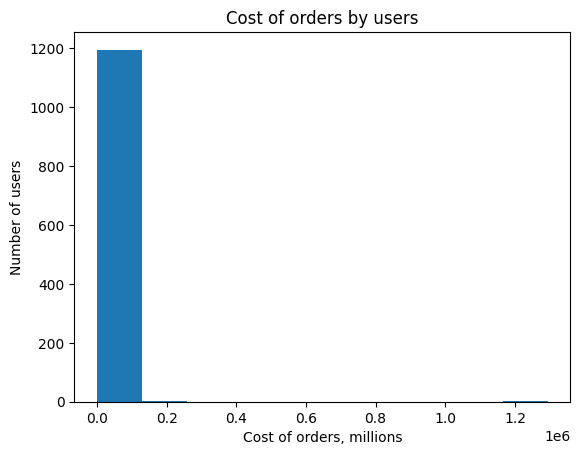

In [27]:
# Construct a dot plot of order values:

plt.hist(orders['revenue'])
plt.title('Cost of orders by users')
plt.xlabel('Cost of orders, millions')
plt.ylabel('Number of users')
plt.show();

In [28]:
display(orders['revenue'].describe())

count       1,197.000
mean        8,348.006
std        39,191.132
min            50.000
25%         1,220.000
50%         2,978.000
75%         8,290.000
max     1,294,500.000
Name: revenue, dtype: float64

- Максимальный заказ был 1,294,500

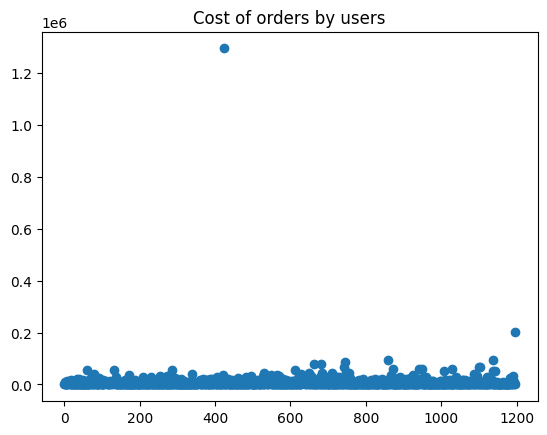

In [29]:
# A dot plot of the number of orders by user:

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Cost of orders by users')
plt.show();

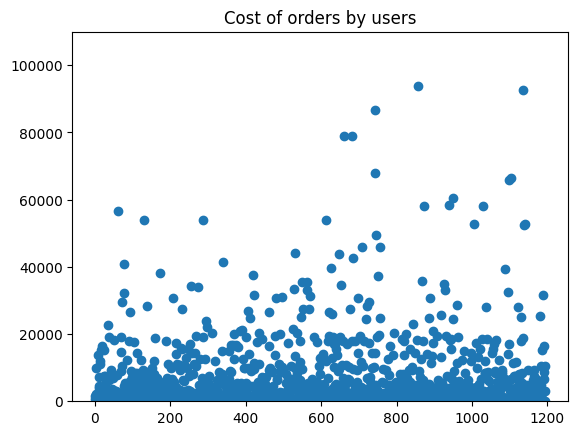

In [30]:
# A dot plot of the number of orders by user:

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.ylim(0, 110000)
plt.scatter(x_values, orders['revenue'])
plt.title('Cost of orders by users')
plt.show();

- There are 2 large orders, 1.3 million and 200k.

In [31]:
# Calculate the 95th and 99th percentiles of order value:

np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

- No more than 5% of users order value more than 28000
- Not more than 1% of users order value more than 58233.2

**Calculate the statistical significance of differences in the average number of orders per visitor between groups using "raw" data:**

Set:
- H0 - there are no differences in the average number of orders per visitor between groups.
- H1 - there are differences in the average number of orders per visitor between groups.
--------------
- Alpha = 0.05

In [32]:
# Data preparation:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head())

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Let's create variables ordersByUsersA and ordersByUsersB; in them, for users who ordered at least once, we will specify the number of completed orders.

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

Let's declare variables sampleA and sampleB, in which users from different groups will correspond to the number of orders. Those who have not ordered anything will be matched with zeros. This is necessary to prepare the samples for Mann-Whitney test.

In [34]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() -
                     len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() -
                     len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [35]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('alpha = 0.05')
print("Relative growth B to A: {0:.3%}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
alpha = 0.05
Relative growth B to A: 13.808%


- P-value < alpha
- Reject H0.
- Accept H1 - statistically significant difference between the groups.

---------

**Calculate the statistical significance of differences in average order receipt between groups using "raw" data:**

Set:
- H0 - there are no differences in average cheque between groups.
- H1 - there are differences in average cheque between groups.
--------------
- Alpha = 0.05

In [36]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('alpha = 0.05')
print('Relative growth B to A: {0:.3%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
alpha = 0.05
Relative growth B to A: 25.871%


- P-value > alpha
- Accept H0 - no statistically significant difference between the groups.

---------

**Calculate the statistical significance of differences in the average number of orders per visitor between groups using "cleaned" data:**

- **Take the 99th percentile as anomalies:**
- No more than 1% of users made more than 4 purchases
- No more than 1% of users had an order value greater than 58233.2
-------
- H0 - no differences in the average number of orders per visitor between groups.
- H1 - there are differences in the average number of orders per visitor between groups.

In [37]:
many_orders = np.percentile(ordersByUsers['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > many_orders]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > many_orders]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > expensive_orders]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(f'Аномальные пользователи: {abnormalUsers.shape[0]}')

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64
Аномальные пользователи: 15


In [38]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [39]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('alpha = 0.05')
print('Relative growth B to A: {0:.3%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.014
alpha = 0.05
Relative growth B to A: 15.331%


- P-value < alpha
- Reject H0.
- Accept H1 - there is a statistically significant difference in the average number of orders per visitor between the groups.

-------

**Calculate the statistical significance of differences in the average order receipt between groups using "cleaned" data:**

- H0 - there are no differences in average order receipt between groups.
- H1 - there are differences in the average order receipt between groups.

In [40]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(
                orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'],
                orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'],)[1])
)

print('alpha = 0.05')

print("Relative growth B to A: {0:.3%}".format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
)]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'].mean() - 1)
)

P-value: 0.851
alpha = 0.05
Relative growth B to A: -0.575%


- P-value > alpha
- We accept H0 - there is no statistically significant difference in the average order receipt between the groups.

--------

## 4. Conclusions: decision making in the business "Internet shop"

**Part 1:** Prioritisation of hypotheses from the prepared list:

Based on the study, the presented hypotheses were prioritised using 'ICE' and 'RICE' method:


                                   'ICE'.
- **1.** - To launch a promotion giving discount on goods on birthday - 16.2
- **2.** - Add two new channels to attract 30% more users - 13.3
- **3.** - Add a subscription form to all main pages to build a customer base for email newsletters - 11.2
- **4.** - Show banners with current promotions and sales on the homepage to increase conversion - 8.0
- **5.** - Add product recommendation blocks to the website of an online shop to increase conversion rate and average order receipt - 7.0




                                   'RICE'
- **1.** - Add a subscription form to all main pages to build a customer base for email newsletters - 112.0
- **2.** - Add product recommendation blocks to online shop website to increase conversion rate and average order receipt - 56.0
- **3.** - Add two new channels to attract 30% more users - 40.0
- **4.** - Show banners with current promotions and sales on the homepage to increase conversion rate - 40.0
- **5.** - Launch a promotion that gives a discount on a product's birthday - 16.2

**Part 2:** A/B test analysis and decision making:

**Statistical significance of differences in the average number of orders per visitor between groups on raw and cleaned data:**
- Group B's conversion rate is higher than A's;
- On "raw" - Accept H1 - statistically significant difference is observed; Relative increase of B to A: 13.81%
- By "purified" - Accept H1 - statistically significant difference is observed; Relative increase of B to A: 15.33%

**Statistical significance of differences in average order receipt between groups on "raw" and "cleaned" data:**
- Group B's average cheque is higher;
- On "raw" - Accept H0 - no statistically significant difference is observed; Relative increase of B to A: 25.87%
- On "cleaned" - Accept H0 - no statistically significant difference is observed; Relative increase of B to A: -0.57%

- The graph of the relative change in the cumulative average number of orders per visitor of group B to group A shows that before ≈5 August group A was higher, but after that date group B pulled ahead and since ≈17 August has been smoothly correcting, now group B is growing again.

**According to paragraph #14, a decision must be made on the results of the test:** **
### **Based on the analysis it is recommended to stop the test, state that the conversion rate of group B exceeds that of group A and fix the victory of group B.**.
### There will be an impact on revenue, as the number of orders increases, revenue will increase (with the same average cheque).**